# MODUL IV: TRANSFORMASI WAVELET

#### Import Library
Baris code di bawah ini digunakan untuk menginpor fungsi-fungsi yang akan digunakan dengan perincian
- matplotlib.pyplot digunakan untuk membuat grafik sederhana 2d.
- numpy digunakan untuk membantu dalam membaca gambar ke dalam bentuk array.
- cv2 atau OpenCV berfungsi untuk melakukan konversi color space.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

#### Deklarasi dan Inisialisasi Citra
Fungsi imread digunakan untuk membaca suatu data citra dari file yang mana dalam baris perintah di bawah ini masing-masing hasil transformasi wavelet telah disimpan ke masing-masing variabel LL, HH, LH, HL, dan HH.

In [2]:
#read the image

LL = plt.imread("LL.jpg")
#LL untuk menyimpan hasil transformasi wavelet approksimasi

LH = plt.imread("LH.jpg")
#LH untuk menyimpan hasil transformasi wavelet detail vertical

HL = plt.imread("HL.jpg")
#HL untuk menyimpan hasil tranformasi wavelet detail horizontal

HH = plt.imread("HH.jpg")
#HH untuk menyimpan hasil tranformasi wavelet detail diagonal

#### Mengubah Citra ke dalam Grayscale
Perintah di bawah ini digunakan untuk mengubah citra berwarna ke dalam grayscale.Fungsi cvtColor digunakan untuk mengubah gambar ke dalam warna yang diinginkan. 
- Pertama, fungsi akan menerima citra asli yang ditunjukkan oleh image
- Kedua, fungsi akan mengonversikan citra ke dalam bentuk yang diingikan dalam hal ini digunakan cv.COLOR_BGR2GRAY
- Ketiga, hasil color space conversion disimpan ke dalam variable yang telah dibuat

In [3]:
#convert to gray
LL = cv.cvtColor(LL, cv.COLOR_RGB2GRAY)
LH = cv.cvtColor(LH, cv.COLOR_RGB2GRAY)
HL = cv.cvtColor(HL, cv.COLOR_RGB2GRAY)
HH = cv.cvtColor(HH, cv.COLOR_RGB2GRAY)

#### Menampilkan Citra

Fungsi preview digunakan untuk menampilkan hasil dekomposisi citra. Pada fungsi ini digunakan 4 buah parameter yang masing-masing merupakan subband hasil dekomposisi.

In [4]:
def preview(app_img, hor_img, ver_img, dia_img):
    figure = plt.figure(figsize = [8,8])
    #figsize digunakan untuk menentukan besaran lebar dan tinggi dari figure yang akan dibuat

    figure.add_subplot (2,2,1)
    #subplot digunakan untuk menentukan posisi yang secara berurutan membutuhkan parameter
    # nrows, ncols, dan index
    plt.title ('Aproksimasi // LL')
    #memberikan judul dari subplot
    plt.imshow (app_img, cmap = 'gray')
    #menampilkan citra ke dalam bentuk grayscale

    figure.add_subplot (2,2,2)
    #subplot digunakan untuk menentukan posisi yang secara berurutan membutuhkan parameter
    # nrows, ncols, dan index
    plt.title ('Detail Horizontal // HL')
    #memberikan judul dari subplot
    plt.imshow (hor_img, cmap = 'gray')
    #menampilkan citra ke dalam bentuk grayscale

    figure.add_subplot (2,2,3)
    #subplot digunakan untuk menentukan posisi yang secara berurutan membutuhkan parameter
    # nrows, ncols, dan index
    plt.title ('Detail Vertikal // LH')
    #memberikan judul dari subplot
    plt.imshow (ver_img, cmap = 'gray')
    #menampilkan citra ke dalam bentuk grayscale

    figure.add_subplot (2,2,4)
    #subplot digunakan untuk menentukan posisi yang secara berurutan membutuhkan parameter
    # nrows, ncols, dan index
    plt.title ('Detail Diagonal // HH')
    #memberikan judul dari subplot
    plt.imshow (dia_img, cmap = 'gray')
    #menampilkan citra ke dalam bentuk grayscale

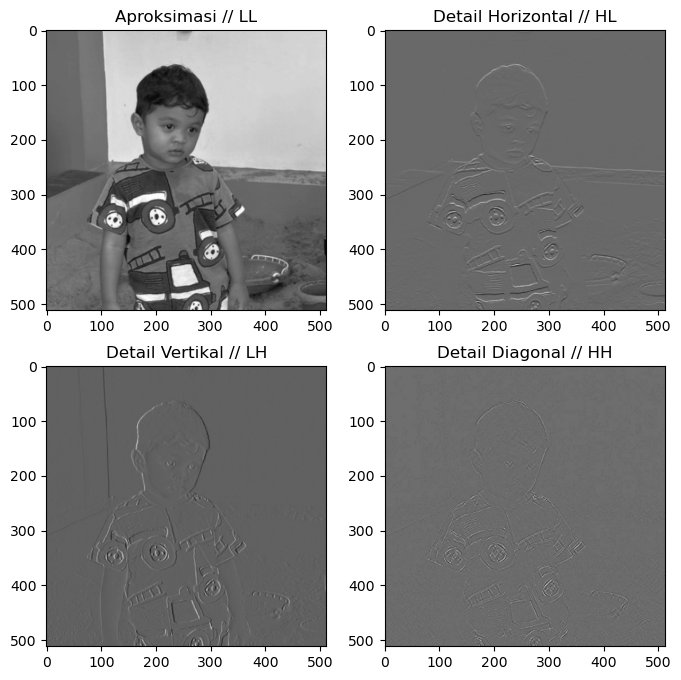

In [5]:
#menampikan citra
preview(LL,HL,LH,HH)

#### Wavelet Image Reconstruction and Decomposition Algorithm

Gambar di bawah ini merupakan langkah-langkah yang digunakan dalam baris perintah untuk melakukan proses rekonstruksi dan dekomposisi

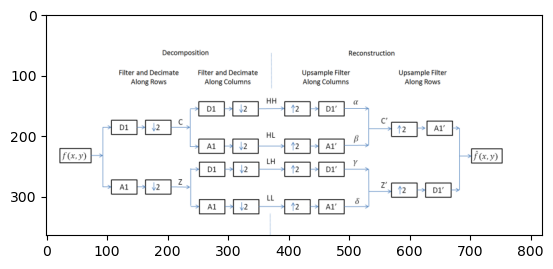

In [6]:
algorithm = plt.imread('algo.png')
plt.imshow(algorithm)

###  SOAL 1
Lakukan rekonstruksi Wavelet terhadap citra pada folder assets

#### Algoritma Rekonstruksi

1. Dari setiap subband yang dihasilkan akan dialkukan proses upsampling terhadap kolom.
2. Berikutnya, hasil upsampling masing-masing subband akan dijumlahkan dengan ketentuan LL+LH dan HL+HH
3. Hasil penjumlahan pada langkah kedua berikutnya akan dilakukan kembali proses upsampling terhadapa baris.
4. Hasil masing-masing proses pada langkah ketiga berikutnya akan dijumlahkan untuk menghasilkan citra asli

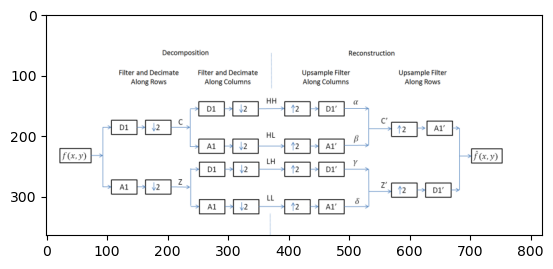

In [7]:
plt.imshow(algorithm)

#### Deklarasi dan Inisialisasi Kernel
Dalam melakukan proses rekonstruksi diperlukan kernel yang merupakan reverse dari kernel yang digunakan pada untuk proses dekomposisi. Agar lebih jelasnya, dapat diperhatikan perbedaan di bawah ini:

Decomposition Lowpass Kernel
([[0.7], [0.7]])
Reconstruction Lowpass Kernel
([[0.7], [0.7]])

Decomposition Highpass Kernel
([[-0.7], [0.7]])
Reconstruction Highpass Kernel
([[0.7], [-0.7]])

In [8]:
#rev kernel x
rev_lo = np.array([[0.7], [0.7]])
rev_hi = np.array([[0.7], [-0.7]])

#### Konvolusi

In [9]:
#convolution
def conv(img,kernel):
    h_img, w_img = img.shape
    h_ker,w_ker  = kernel.shape
    
    #mencari nilai tengah dari kernel
    #operand // digunakan agar hasil pembagian bernilai integer
    h_center = ((h_ker-1)//2)
    w_center = ((w_ker - 1)//2)
    
    #digunakan untuk menyimpan hasil konvolusi
    #karena menggunakan paddiny, maka besarannya akan sama dengan besaran citra asli
    h_res = h_img
    w_res = w_img
    
    #mendapatkan ukuran padding 
    l_pad = w_center
    #left padding
    r_pad = w_ker - w_center
    #right padding
    t_pad = h_center
    #top padding
    b_pad = h_ker - h_center
    #bottom padding
    
    arr = np.pad(img,((l_pad,r_pad),(t_pad,b_pad)), mode = 'edge')
    #np.pad digunakan untuk melakukan padding pada sisian array yang mana dalam hal ini
    #parameter pertama menunjukkan array yang akan dilakukan padding
    #parameter kedua, yaitu padd width menunjukkan pada bagian mana saja akan dilakukan 
    #parameter ketiga, yaitu mode padding yang digunakan yang mana pada baris perintah ini digunakan mode edge
    #mode edge berarti akan dilakukan padding menggunakan nilai tepi pada array
    
    result = np.zeros((h_res,w_res))
     #membuat array dengan besaran sesuai citra yang akan dikonvolusikan yang akan diolah dan berisi 0
    
    #perulangan di bawah  ini dilakukan untuk melakukan proses konvolusi 
    for i in range(h_res):
        for j in range (w_res):
            #variabel temp digunakan untuk menampung hasil sum of product 
            temp = 0
            for k in range (h_ker):
                for l in range (w_ker):
                    temp+= arr[i+k,j+l]* kernel[k,l]
            result[i,j] = temp
    return result

### Upsampling

Upsampling merupakan proses untuk menyisipkan nilai 0 diantara nilai asli sample. Fungsi upsampling digunakan untuk melakukan proses tersebut dengan menggunakan 2 parameter, yaitu img yang merujuk pada citra sample asli dan direction yang merujuk pada bagian mana akan dilakukan penambahan jumlah (tinggi atau lebar).

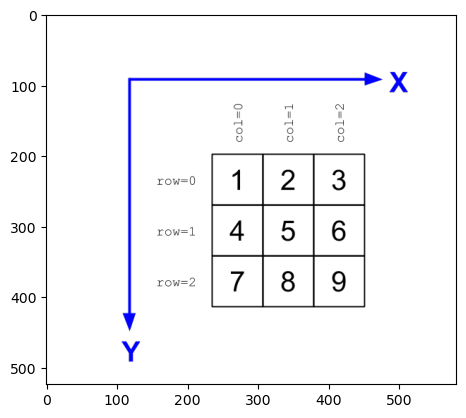

In [10]:
rowcol = plt.imread('rowcol.png')
plt.imshow(rowcol)

#### Code Explanation

Pada baris perintah dapat diketahui apabila direction bernilai row maka tinggi akan diperbesar dengan skala 2. Seperti yang terlihat pada gambar di atas apabila akan dilakukan penambahan row maka akan dilakukan penambahan ke bawah yang berarti tinggi. Berlaku juga apabila direction bernilai col maka lebar akan diperbesar dengan skala 2.

Berikutnya, dilakukan perbesaran dengan skala 2 dikarenakan pada saat melakukan proses dekomposisi di tahap pertama, citra dengan ukuran NxN ditransormasikan menjadi 2 citra dengan ukuran N * (N/2) dan pada tahap kedua citra ditransformasikan menjadi 4 citra dengan ukuran (N/2)* (N/2). Dikarenakan terdapat 2 kali proses upsampling maka digunakan skala 2 untuk merestorasi citra ke ukuran semula. 

Pada proses upsampling ini juga, nilai-nilai asli pada citra disisipkan pada index bernilai genap (bergantung pada direction yang diinginkan). Mengapa demikian? Hal ini dikarenakan pada proses dekomposisi, downsampling dilakukan dengan mempertahankan baris dengan index genap pada tahap pertama dan kolom dengan index genap pada tahap kedua.

In [11]:
#upsampling
def upsampling(img,direction):
    h,w = img.shape
    if(direction == 'row'):
        result = np.zeros((h*2,w))
        result[::2,::] = img
    else:
        result = np.zeros((h,w*2))
        result[::,::2] = img
    return result

#### Reverse LL

Fungsi rev_approximate digunakan untuk melakukan rekonstruksi pada subband LL dengan algoritma sebagai berikut:
1. Melakukan proses upsampling citra LL pada kolom dan disimpan pada variabel up
2. Melakukan proses konvolusi dengan memanggil fungsi conv beserta parameternya, yaitu hasil upsampling kolom pada langkah 1 serta kernel yang digunakan, yaitu transpose kernel reverse lowpass filter
3. Mengembalikan hasil reverse LL pada fungsi pemanggil

In [12]:
def rev_approximate(img):
    up = upsampling(img,'col')
    filter_up_rev = conv(up,np.transpose(rev_lo))
    return filter_up_rev

#### Reverse LH

Fungsi rev_vertical digunakan untuk melakukan rekonstruksi pada subband LH dengan algoritma sebagai berikut:
1. Melakukan proses upsampling citra LH pada kolom dan disimpan pada variabel up
2. Melakukan proses konvolusi dengan memanggil fungsi conv beserta parameternya, yaitu hasil upsampling kolom pada langkah 1 serta kernel yang digunakan, yaitu transpose kernel reverse highpass filter
3. Mengembalikan hasil reverse LH pada fungsi pemanggil

In [13]:
def rev_vertical(img):
    up = upsampling(img,'col')
    filter_up_rev = conv(up,np.transpose(rev_hi))
    return filter_up_rev

#### Reverse HL

Fungsi rev_horizontal digunakan untuk melakukan rekonstruksi pada subband HL dengan algoritma sebagai berikut:
1. Melakukan proses upsampling citra HL pada kolom dan disimpan pada variabel up
2. Melakukan proses konvolusi dengan memanggil fungsi conv beserta parameternya, yaitu hasil upsampling kolom pada langkah 1 serta kernel yang digunakan, yaitu transpose kernel reverse lowpass filter
3. Mengembalikan hasil reverse HL pada fungsi pemanggil

In [14]:
def rev_horizontal(img):
    up = upsampling(img,'col')
    filter_up_rev = conv(up,np.transpose(rev_lo))
    return filter_up_rev

#### Reverse HH

Fungsi rev_diagonal digunakan untuk melakukan rekonstruksi pada subband HH dengan algoritma sebagai berikut:
1. Melakukan proses upsampling citra HH pada kolom dan disimpan pada variabel up
2. Melakukan proses konvolusi dengan memanggil fungsi conv beserta parameternya, yaitu hasil upsampling kolom pada langkah 1 serta kernel yang digunakan, yaitu transpose kernel reverse highpass filter
3. Mengembalikan hasil reverse HH pada fungsi pemanggil

In [15]:
def rev_diagonal(img):
    up = upsampling(img,'col')
    filter_up_rev = conv(up,np.transpose(rev_hi))
    return filter_up_rev

#### Reverse High

Fungsi rev_high digunakan untuk melakukan rekonstruksi pada subband yang menggunakan highpass filter di tahap pertama yang mana subband itu ialah HL (vertical) dan HH (diagonal). Pada fungsi ini digunakan satu parameter yang merupakan hasil penjumlahan hasil reverse subband HL dan HH. Berikutnya, dalam proses reverse highpass filter digunakan algoritma sebagai berikut:

1. Melakukan proses upsampling baris pada citra parameter dengan memangil fungsi upsampling dan hasilnya disimpan apda variabel up_join.
2. Melakukan proses konvolusi dengan memanggil fungsi conv beserta parameternya, yaitu hasil upsampling baris pada langkah 1 serta kernel yang akan digunakan, yaitu kernel reverse highpass filter.
3. Mengembalikan hasil pada fungsi pemanggil.

In [16]:
def rev_high(img):
    up_join = upsampling(img,'row')
    up_filter = conv(up_join,rev_hi)
    return up_filter

#### Reverse Low

Fungsi rev_high digunakan untuk melakukan rekonstruksi pada subband yang menggunakan highpass filter di tahap pertama yang mana subband itu ialah LL (approximate) dan LH (horizontal). Pada fungsi ini digunakan satu parameter yang merupakan hasil penjumlahan hasil reverse subband LL dan LH. Berikutnya, dalam proses reverse lowpass filter digunakan algoritma sebagai berikut:

1. Melakukan proses upsampling baris pada citra parameter dengan memangil fungsi upsampling dan hasilnya disimpan pada variabel up_join.
2. Melakukan proses konvolusi dengan memanggil fungsi conv beserta parameternya, yaitu hasil upsampling baris pada langkah 1 serta kernel yang akan digunakan, yaitu kernel reverse lowpass filter.
3. Mengembalikan hasil pada fungsi pemanggil.

In [17]:
def rev_low(img):
    up_join = upsampling(img,'row')
    up_filter = conv(up_join,rev_lo)
    return up_filter

#### Reverse Masing-Masing Subband

Baris perintah di bawah ini digunakan untuk menyimpan hasil penjumlahan reverse subband (didapatkan dengan memanggil fungsi reversr) yang dikelompokkan berdasarkan filter yang digunakan pada tahap pertama dalam proses dekomposisi. Hasil penjumlahan ini akan digunakan untuk memanggil fungsi reverse pada tahapan terakhir.

In [18]:
#join_low digunakan untuk menyimpan hasil penjumlagan hasil rekonstruksi subband LL dan LH
join_low  = rev_approximate(LL) + rev_vertical(LH)

#join_high digunakan untuk menyimpan hasil penjumlagan hasil rekonstruksi subbandHL dan HH
join_high = rev_horizontal(HL) + rev_diagonal(HH)

#### Reverse Berdasarkan Filter

Berikutny akan dilakukan reverse yang disesuaikan dengan filter yang pertama kali digunakan dalam tahap pertama proses dekomposisi. Dikarenakan LL dan LH (telah dijumlahkan pada variabel join_low) menggunakan lowpass filter maka dipanggil fungsi rev_low. Hal yang serupa berlaku untuk HL dan HH (telah dijumlahkan pada variabel join_high) yang menggunakan highpass filter maka dipanggiil fungsi rev_high. Hasil dari reverse filter ini berikutny dijumlahkan untuk mendapatkan citra sebenarnya.

In [19]:
#final_img digunakan untuk menyimpan citra final hasil penjumlahan antara reverse low dan reverse high
final_img = rev_low(join_low) + rev_high(join_high)

#### Menampilkan Citra Hasil Rekonstruksi

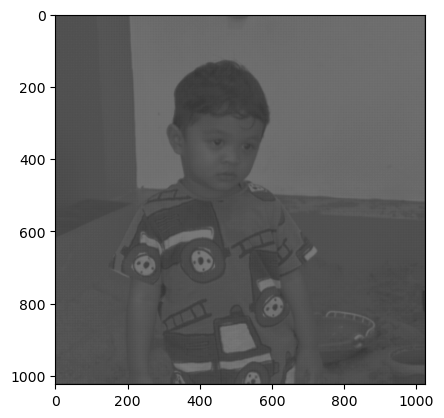

In [20]:
plt.imshow(final_img, cmap = 'gray')

### SOAL 2

Lakukan Dekomposisi Wavelet Level 1 pada citra hasil rekonstruksi menggunakan kernel x.

#### Deklarasi dan Inisialisasi Kernel
Sama halny dalam melakukan proses rekonstruksi, dalam melakukan proses dekomposisi diperlukan kernel atau filter yang mana terdapat 2 macam filter, yaitu lowpass filter (scalling function) yang tersimpan di dalam variabel lo dan highpass filter (wavelet function) yang tersimpan di dalam variabel hi.

In [21]:
#kernel x
lo = np.array([[0.7], [0.7]])
hi = np.array([[-0.7], [0.7]])

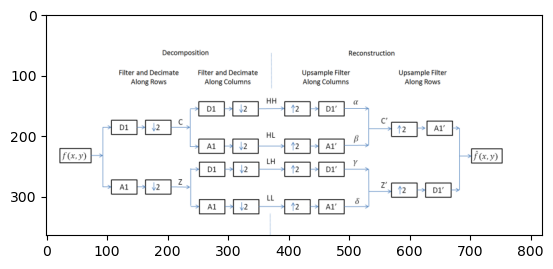

In [22]:
plt.imshow(algorithm)

#### TAHAP 1

Pada tahapan pertama dekomposisi dilakukan proses konvolusi citra asli menggunakan lowpass dan highpass filter yang mana hasil dari masing-masing konvolusi akan dilakukan proses downsampling, yaitu hanya mempertahankan nilai-nilai yang pada baris genap.

#### Lowpass Filter

Fungsi low digunakan untuk melakukan proses filtering dengan lowpass filter serta melakukan proses downsampling dengan hanya mempertahankan baris pada indeks genap. Hasil dari fungsi ini nantinya akan digunakan dalam mencari nilai LL dan LH.

In [23]:
def low(img):
    #conv row
    low = conv(img,lo)
    #downsampling row
    low_down = low[0::2,::]
    
    return low_down

#### Highpass Filter

Fungsi high digunakan untuk melakukan proses filtering dengan highpass filter serta melakukan proses downsampling dengan hanya mempertahankan baris pada indeks genap. Hasil dari fungsi ini nantinya akan digunakan dalam mencari nilai HL dan HH

In [24]:
def high(img):
     #conv row
    high = conv(img,hi)
    #downsampling row
    high_down = high[0::2,::]
    
    return high_down

#### TAHAP 2

Pada tahapan kedua, hasil dari tahapan pertama akan dilakukan proses filtering dan downsampling kolom sesuai dengan bagan yang telah tertampil di atas. Adapun alur agar menghasilkan masing-masing subband adalah sebagai berikut:

- Lowpass Filter  -> Konvolusi+Transpose Lowpass Filter  -> Downsampling -> LL
- Lowpass Filter  -> Konvolusi+Transpose Highpass Filter -> Downsampling -> LH
- Highpass Filter -> Konvolusi+Transpose Lowpass Filter  -> Downsampling -> HL
- Highpass Filter -> Konvolusi+Transpose Highpass Filter -> Downsampling -> HH

Dalam mengimplementasikan tahap kedua ini, terdapat 4 fungsi yang telah dibuat untuk masing-masing subband dengan setiap fungsi memiliki sebuah parameter, yaitu citra hasil rekonstruksi yang telah didapati sebelumnya.

#### LL

Fungsi approximate digunakan untuk melakukan dekomposisi dan menghasilkan subband LL dengan algoritma sebagai berikut:
1. Melakukan proses konvolusi dengan memanggil fungsi conv dan digunakan parameter berupa hasil perhitungan tahap 1 serta tranpose dari lowpass filter. Hasilnya disimpan pada variabel low_low
2. Melakukan proses downsampling terhadap hasil konvolusi dengan hanya menyimpan nilai-nilai kolom pada indeks genap dan disimpan pada variabel lwo_low_down.
3. Mengembalikan hasil perhitungan pada fungsi pemanggil

In [25]:
def approximate(img):
    #low low
    
    #conv col
    low_low = conv(low(img), np.transpose(lo))
    #downsampling col
    low_low_down = low_low[::,::2]
    
    return low_low_down

#### LH

Fungsi vertical digunakan untuk melakukan dekomposisi dan menghasilkan subband LH dengan algoritma sebagai berikut:
1. Melakukan proses konvolusi dengan memanggil fungsi conv dan digunakan parameter berupa hasil perhitungan tahap 1 serta tranpose dari highpass filter. Hasilnya disimpan pada variabel low_high
2. Melakukan proses downsampling terhadap hasil konvolusi dengan hanya menyimpan nilai-nilai kolom pada indeks genap dan disimpan pada variabel low_high_down.
3. Mengembalikan hasil perhitungan pada fungsi pemanggil

In [26]:
def vertical(img):
    #low high
    
    #conv col
    low_high = conv(low(img), np.transpose(hi))
    #downsampling col
    low_high_down = low_high[::,::2]
    
    return low_high_down

#### HL

Fungsi horizontal digunakan untuk melakukan dekomposisi dan menghasilkan subband HL dengan algoritma sebagai berikut:
1. Melakukan proses konvolusi dengan memanggil fungsi conv dan digunakan parameter berupa hasil perhitungan tahap 1 serta tranpose dari lowpass filter. Hasilnya disimpan pada variabel high_low
2. Melakukan proses downsampling terhadap hasil konvolusi dengan hanya menyimpan nilai-nilai kolom pada indeks genap dan disimpan pada variabel high_low_down.
3. Mengembalikan hasil perhitungan pada fungsi pemanggil.

In [27]:
def horizontal(img):
    #high low
    
    #conv col
    high_low = conv(high(img), np.transpose(lo))
    #downsampling col
    high_low_down = high_low[::,::2]
    
    return high_low_down

#### HH

Fungsi diagonal digunakan untuk melakukan dekomposisi dan menghasilkan subband HH dengan algoritma sebagai berikut:
1. Melakukan proses konvolusi dengan memanggil fungsi conv dan digunakan parameter berupa hasil perhitungan tahap 1 serta tranpose dari highpass filter. Hasilnya disimpan pada variabel low_low
2. Melakukan proses downsampling terhadap hasil konvolusi dengan hanya menyimpan nilai-nilai kolom pada indeks genap dan disimpan pada variabel high_high_down.
3. Mengembalikan hasil perhitungan pada fungsi pemanggil

In [28]:
def diagonal(img):
    #high high
    
    #conv col
    high_high = conv(high(img), np.transpose(hi))
    #downsampling col
    high_high_down = high_high[::,::2]
    
    return high_high_down

#### Menampilkan Hasil Dekomposisi

Untuk menampilkan hasil dekomposisi, digunakan fungsi preview dengan parameter adalah hasil dari pencarian masing-masing subband. Nilai masing-masing subband didapati dengan memanggil masing-masing fungsi pencari nilai subband.

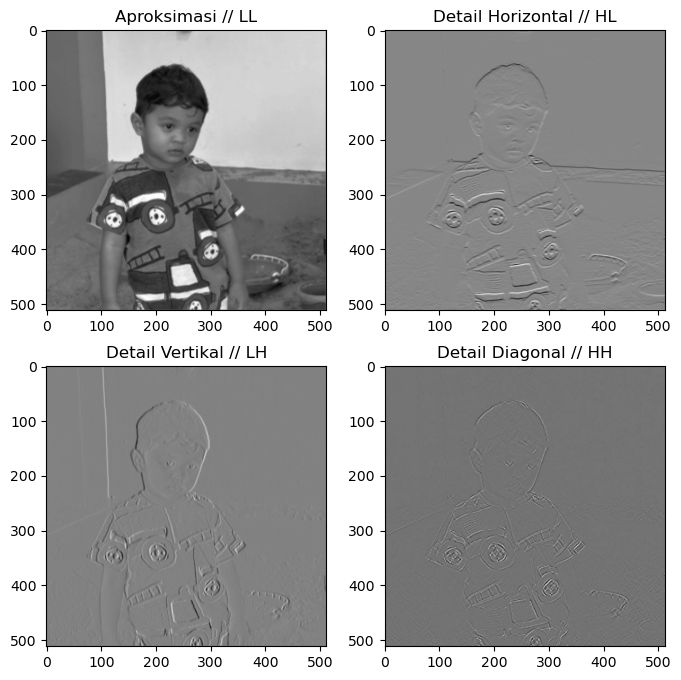

In [29]:
preview(approximate(final_img),horizontal(final_img),vertical(final_img),diagonal(final_img))

### SOAL 3

Lakukan Dekomposisi Wavelet Level 2 pada hasil dekomposisi level 1 menggunakan kernel x dan tampilkan citra seperti gambar berikut:

Untuk melakukan Dekomposisi Wavelet Level 2 dibutuhkan subband LL pada dekomposisi level 1. Subband LL digunakan karena memiliki approksimasi dari citra asli, sedangkan subband yang lainnya berisi detail. Adapun gambaran dari Dekomposisi Wavelet Level 2 seperti di bawah ini:

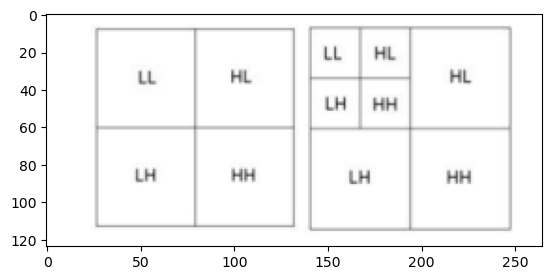

In [30]:
twoLevel = plt.imread("waveletTwo.png")
plt.imshow(twoLevel)

#### Mencari Nilai LL pada Dekomposisi Level 1

Baris perintah di bawah ini digunakan untuk mencari nilai LL yang akan digunakan sebagai nilai input untuk melakukan dekomposisi wavelet level 2. Untuk mencari nilai LL hanya perlu dilakukan pemanggilan fungsi approximate dengan parameter citra hasil rekonstruksi. Nilai LL pada dekomposisi level 1 disimpan pada variabel app2.

In [31]:
app2 = approximate(final_img)

#### Mencari dan Menampikan Hasil Dekomposisi Wavelet Level 2

Apabila diperhatikan, pada baris perintah di bawah digunakan subband LL hasil dekomposisi level 1 sebagai citra yang akan diolah

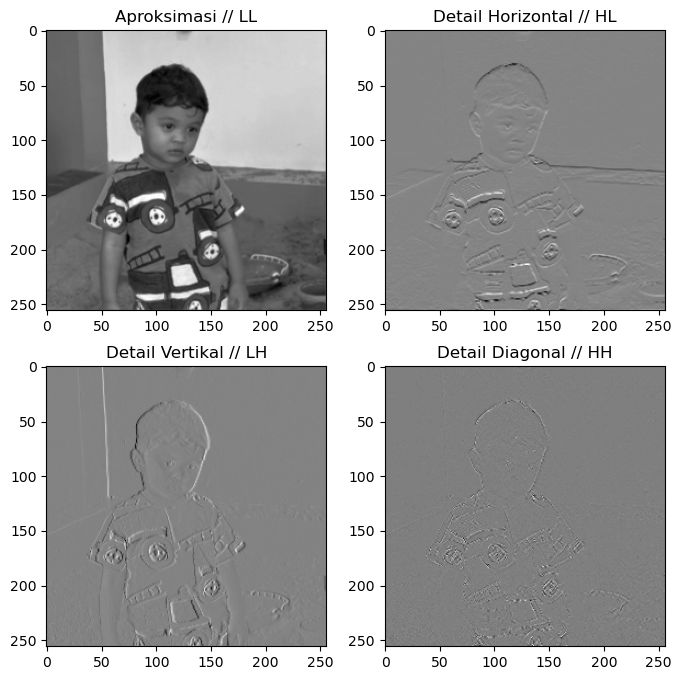

In [32]:
preview(approximate(app2),horizontal(app2),vertical(app2),diagonal(app2))